In [2]:
import json
import requests
import pandas as pd
from config import api_key
from pathlib import Path
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Zillow Data URL
URL_Data_Csv = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA.json?qopts.export=true&api_key={api_key}")

# API Call
data_csv = requests.get(URL_Data_Csv).json()

In [26]:
# Retrieve csv download link
data_link = data_csv['datatable_bulk_download']['file']['link']
data_link

'https://quandl-production-datahub.s3.amazonaws.com/export/ZILLOW/DATA/ZILLOW_DATA_962c837a6ccefddddf190101e0bafdaf.zip?X-Amz-Expires=1800&X-Amz-Date=20231004T012115Z&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEDIaCXVzLWVhc3QtMSJHMEUCIQCoJfzhCM4ZhOhj2JYJhPbsUUcewT%2BLNdrAEDNvEZwxKgIgXi1jY6Q4TEuc9z5CWOCx9IUA/wlIiScTEkPs7DtZDmkqsgUIOhACGgwzMDYzMjA1MDAyMDQiDHDvjMuQvu0UXSnV%2BiqPBf3sC7g3dn02lBjNa%2BeF0dYXZ%2B3fqitsynoy5qnxrhuodgJ9NrYESxe4%2BM2rEOOfXJ0di%2BNcugUokKEoLROB1/yREefDMJkpuo4mRx/YejlV/sfNPjX5zl5AO5v82a1A/EpWvh4%2BDxNHZWx1IUHIwaBDbsdwhRI7nMi7x3vuK3U9On7Blpc5mPPQr0Q3hjsVaWQxbflMZyQsZw5We5RxEVFO9omz01cMQC7bzm28/PgBatogyTBS251lu/J%2B1UrajaM3NoGv4U7k0oSnc3oatyEnnECMgJmXbi0RO6rkKpnACwu3xMfv8QlarGveJU9TG67539SXLlXMpjh%2B42VJGYnFsczt6ZTucl87SPRqewRPPXtxFjIJsPxb45LYuwi3q/nlckdf5MjaLBM6KxnRwWfrXoeBm5qZ3tvjHE4FRWMJm8Wq3CeuQAbPtqtovehcZasMF9y7N7wwreKmexwpoou3qzPRPr%2BXeQl1HSmIbGggcn/fJoUTF2fpSI%2BGtPFVGSQkkTWXnzZPLqfaplXol0yVsdkuK1j27Y4ZcyAyxx8/QeeY/zaKC8tgAsRUIjao5MBggAlGQ9V3ijLflJfEtbzfMJBGc3k9Zm

In [27]:
# CSV File Paths
path_data = Path("Resources", "Zillow_Data.csv")

# Create DataFrames for the CSV Files
data_df = pd.read_csv(path_data)
data_df.head()

,indicator_id,region_id,date,value
0,ZATT,3101,1998-01-31,338849.0
1,ZATT,3101,1998-02-28,342993.0
2,ZATT,3101,1998-03-31,346763.0
3,ZATT,3101,1998-04-30,349356.0
4,ZATT,3101,1998-05-31,351981.0


In [28]:
# Zillow Indicators URL
URL_Indicators = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/INDICATORS.json?&api_key={api_key}")

# API Call
response_ind = requests.get(URL_Indicators).json()

# Create Indicators DataFrame
indicators_df = pd.DataFrame(response_ind['datatable']['data'])

# Rename columns
indicators_df = indicators_df.rename(columns = {0: 'indicator_id', 
                          1: 'indicator', 
                          2: 'category',
                                               })

indicators_df.head()

,indicator_id,indicator,category
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values


In [29]:
# Zillow Regions URL
URL_Regions = (f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/REGIONS.json?qopts.export=true&api_key={api_key}")

# API Call
regions_csv = requests.get(URL_Regions).json()

In [30]:
# Retrieve csv download link
regions_link = regions_csv['datatable_bulk_download']['file']['link']
regions_link

'https://quandl-production-datahub.s3.amazonaws.com/export/ZILLOW/REGIONS/ZILLOW_REGIONS_1a51d107db038a83ac171d604cb48d5b.zip?X-Amz-Expires=1800&X-Amz-Date=20231004T012234Z&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEDIaCXVzLWVhc3QtMSJHMEUCIQCoJfzhCM4ZhOhj2JYJhPbsUUcewT%2BLNdrAEDNvEZwxKgIgXi1jY6Q4TEuc9z5CWOCx9IUA/wlIiScTEkPs7DtZDmkqsgUIOhACGgwzMDYzMjA1MDAyMDQiDHDvjMuQvu0UXSnV%2BiqPBf3sC7g3dn02lBjNa%2BeF0dYXZ%2B3fqitsynoy5qnxrhuodgJ9NrYESxe4%2BM2rEOOfXJ0di%2BNcugUokKEoLROB1/yREefDMJkpuo4mRx/YejlV/sfNPjX5zl5AO5v82a1A/EpWvh4%2BDxNHZWx1IUHIwaBDbsdwhRI7nMi7x3vuK3U9On7Blpc5mPPQr0Q3hjsVaWQxbflMZyQsZw5We5RxEVFO9omz01cMQC7bzm28/PgBatogyTBS251lu/J%2B1UrajaM3NoGv4U7k0oSnc3oatyEnnECMgJmXbi0RO6rkKpnACwu3xMfv8QlarGveJU9TG67539SXLlXMpjh%2B42VJGYnFsczt6ZTucl87SPRqewRPPXtxFjIJsPxb45LYuwi3q/nlckdf5MjaLBM6KxnRwWfrXoeBm5qZ3tvjHE4FRWMJm8Wq3CeuQAbPtqtovehcZasMF9y7N7wwreKmexwpoou3qzPRPr%2BXeQl1HSmIbGggcn/fJoUTF2fpSI%2BGtPFVGSQkkTWXnzZPLqfaplXol0yVsdkuK1j27Y4ZcyAyxx8/QeeY/zaKC8tgAsRUIjao5MBggAlGQ9V3ijLflJfEtbzfMJBG

In [31]:
# CSV File Paths
path_regions = Path("Resources", "Zillow_Regions.csv")

# Create DataFrames for the CSV Files
regions_df = pd.read_csv(path_regions)
regions_df

,region_id,region_type,region
0,394401,metro,"Boone, IA; IA"
1,274772,neigh,Northeast Dallas; TX; Dallas-Fort Worth-Arling...
2,273698,neigh,"Far North; TX; Dallas-Fort Worth-Arlington, TX..."
3,275473,neigh,Southeast Dallas; TX; Dallas-Fort Worth-Arling...
4,196538,neigh,Murray Hill; NY; New York-Newark-Jersey City; ...
...,...,...,...
89300,87837,zip,"68058;NE;Omaha-Council Bluffs, NE-IA;South Ben..."
89301,61652,zip,"10038;NY;New York-Newark-Jersey City, NY-NJ-PA..."
89302,79935,zip,49777;MI;nan;Presque Isle;Presque Isle County
89303,62010,zip,"11109;NY;New York-Newark-Jersey City, NY-NJ-PA..."


In [32]:
# Merge the Data and Indicator DataFrames
df_12 = pd.merge(data_df, indicators_df, on = 'indicator_id', how = 'left')
df_12.head()

,indicator_id,region_id,date,value,indicator,category
0,ZATT,3101,1998-01-31,338849.0,ZHVI All Homes- Top Tier Time Series ($),Home values
1,ZATT,3101,1998-02-28,342993.0,ZHVI All Homes- Top Tier Time Series ($),Home values
2,ZATT,3101,1998-03-31,346763.0,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZATT,3101,1998-04-30,349356.0,ZHVI All Homes- Top Tier Time Series ($),Home values
4,ZATT,3101,1998-05-31,351981.0,ZHVI All Homes- Top Tier Time Series ($),Home values


In [33]:
# Merge all DataFrames
merged_df = pd.merge(df_12, regions_df, on = 'region_id') 
merged_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,ZATT,3101,1998-01-31,338849.000000,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
1,ZATT,3101,1998-02-28,342993.000000,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
2,ZATT,3101,1998-03-31,346763.000000,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
3,ZATT,3101,1998-04-30,349356.000000,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
4,ZATT,3101,1998-05-31,351981.000000,ZHVI All Homes- Top Tier Time Series ($),Home values,county,Los Angeles County;CA;Los Angeles-Long Beach-A...
...,...,...,...,...,...,...,...,...
150217956,Z2BR,144948,2023-04-30,604780.143506,ZHVI 2-Bedroom Time Series ($),Home values,neigh,"Ellinwood;CA;San Francisco-Oakland-Berkeley, C..."
150217957,Z2BR,144948,2023-05-31,605452.096883,ZHVI 2-Bedroom Time Series ($),Home values,neigh,"Ellinwood;CA;San Francisco-Oakland-Berkeley, C..."
150217958,Z2BR,144948,2023-06-30,607939.223821,ZHVI 2-Bedroom Time Series ($),Home values,neigh,"Ellinwood;CA;San Francisco-Oakland-Berkeley, C..."
150217959,Z2BR,144948,2023-07-31,611005.703138,ZHVI 2-Bedroom Time Series ($),Home values,neigh,"Ellinwood;CA;San Francisco-Oakland-Berkeley, C..."


In [38]:
# Isolating for State rows only
bystate_df = merged_df[merged_df['region_type'] == 'state']
bystate_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
34411617,Z5BR,11,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut
34411618,Z4BR,11,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut
34411619,ZATT,11,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
34411620,ZATT,11,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
34411621,ZATT,11,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
...,...,...,...,...,...,...,...,...
76645620,Z4BR,37,2008-10-31,183448.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
76645621,Z4BR,37,2008-11-30,183620.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
76645622,Z4BR,37,2008-12-31,183574.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
76645623,ZCON,37,2023-03-31,173198.232589,ZHVI Condo/Co-op Time Series ($),Home values,state,North Dakota


In [3]:
# # testing stuff

# Connecticutdf = bystate_df[bystate_df['region'] == 'Connecticut']
# Connecticutdf1 = Connecticutdf[Connecticutdf['indicator'] == 'ZHVI All Homes- Top Tier Time Series ($)']
# #Connecticutdf1.sort_values(by = 'date')

# Connecticutdf['indicator'].value_counts()

In [31]:
# Save DF to CSV
bystate_df.to_csv('Resources/bystate.csv', index=False)

In [4]:
# Call in csv
path_cleaning = Path("Resources", "bystate.csv")

cleaning_df = pd.read_csv(path_cleaning)
cleaning_df

,indicator_id,region_id,date,value,indicator,category,region_type,region
0,Z5BR,11,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Home values,state,Connecticut
1,Z4BR,11,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,Connecticut
2,ZATT,11,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
3,ZATT,11,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
4,ZATT,11,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Home values,state,Connecticut
...,...,...,...,...,...,...,...,...
166796,Z4BR,37,2008-10-31,183448.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
166797,Z4BR,37,2008-11-30,183620.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
166798,Z4BR,37,2008-12-31,183574.000000,ZHVI 4-Bedroom Time Series ($),Home values,state,North Dakota
166799,ZCON,37,2023-03-31,173198.232589,ZHVI Condo/Co-op Time Series ($),Home values,state,North Dakota


In [5]:
# Remove these columns
cleaning_df = cleaning_df.drop(['region_id', 'category', 'region_type'], axis=1)

# Remove these rows
cleaning_df = cleaning_df[cleaning_df['indicator'] != 'ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)']
cleaning_df

,indicator_id,date,value,indicator,region
0,Z5BR,2020-10-31,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut
1,Z4BR,2020-10-31,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut
2,ZATT,2000-12-31,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut
3,ZATT,2001-05-31,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut
4,ZATT,2001-06-30,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut
...,...,...,...,...,...
166796,Z4BR,2008-10-31,183448.000000,ZHVI 4-Bedroom Time Series ($),North Dakota
166797,Z4BR,2008-11-30,183620.000000,ZHVI 4-Bedroom Time Series ($),North Dakota
166798,Z4BR,2008-12-31,183574.000000,ZHVI 4-Bedroom Time Series ($),North Dakota
166799,ZCON,2023-03-31,173198.232589,ZHVI Condo/Co-op Time Series ($),North Dakota


In [6]:
# switch date column to date time type
cleaning_df['date'] = pd.to_datetime(cleaning_df['date'])

# add year column
cleaning_df['year'] = cleaning_df['date'].dt.year

# drop original date column
cleaning_df = cleaning_df.drop(['date'], axis = 1)
cleaning_df

,indicator_id,value,indicator,region,year
0,Z5BR,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166796,Z4BR,183448.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166797,Z4BR,183620.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166798,Z4BR,183574.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166799,ZCON,173198.232589,ZHVI Condo/Co-op Time Series ($),North Dakota,2023


In [7]:
# rename columns to more easily understood names
cleaning_df = cleaning_df.rename(columns = {'value': 'price', 'region': 'state', 'indicator': 'property type'})
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999.000000,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419.000000,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608.783913,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899.019849,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367.515211,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166796,Z4BR,183448.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166797,Z4BR,183620.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166798,Z4BR,183574.000000,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166799,ZCON,173198.232589,ZHVI Condo/Co-op Time Series ($),North Dakota,2023


In [8]:
# switch price column to integer
cleaning_df['price'] = cleaning_df['price'].astype('int64')
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,ZHVI 5+ Bedroom Time Series ($),Connecticut,2020
1,Z4BR,385419,ZHVI 4-Bedroom Time Series ($),Connecticut,2020
2,ZATT,338608,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2000
3,ZATT,349899,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
4,ZATT,352367,ZHVI All Homes- Top Tier Time Series ($),Connecticut,2001
...,...,...,...,...,...
166796,Z4BR,183448,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166797,Z4BR,183620,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166798,Z4BR,183574,ZHVI 4-Bedroom Time Series ($),North Dakota,2008
166799,ZCON,173198,ZHVI Condo/Co-op Time Series ($),North Dakota,2023


In [9]:
# add dollar variabe

#add_dollar = lambda x: f'${x}'

# add $ to price column
#cleaning_df['price'] = cleaning_df['price'].apply(add_dollar)
#cleaning_df

In [10]:
# rename property type values to more easily understood names
cleaning_df['property type'] = cleaning_df['property type'].replace({'ZHVI 5+ Bedroom Time Series ($)': '5+ bedroom homes',
                                                            'ZHVI 4-Bedroom Time Series ($)': '4 bedroom homes',
                                                            'ZHVI Single-Family Homes Time Series ($)': 'single-family homes',
                                                            'ZHVI All Homes- Bottom Tier Time Series ($)': 'All home types - bottom tier',
                                                            'ZHVI 3-Bedroom Time Series ($)': '3 bedroom homes',
                                                            'ZHVI 2-Bedroom Time Series ($)': '2 bedroom homes',
                                                            'ZHVI All Homes- Top Tier Time Series ($)': 'All home types - top tier',
                                                            'ZHVI Condo/Co-op Time Series ($)': 'condos',
                                                            'ZHVI 1-Bedroom Time Series ($)': '1 bedroom homes'})
                               
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
2,ZATT,338608,All home types - top tier,Connecticut,2000
3,ZATT,349899,All home types - top tier,Connecticut,2001
4,ZATT,352367,All home types - top tier,Connecticut,2001
...,...,...,...,...,...
166796,Z4BR,183448,4 bedroom homes,North Dakota,2008
166797,Z4BR,183620,4 bedroom homes,North Dakota,2008
166798,Z4BR,183574,4 bedroom homes,North Dakota,2008
166799,ZCON,173198,condos,North Dakota,2023


In [11]:
# Reset index
cleaning_df = cleaning_df.reset_index(drop=True)
cleaning_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
2,ZATT,338608,All home types - top tier,Connecticut,2000
3,ZATT,349899,All home types - top tier,Connecticut,2001
4,ZATT,352367,All home types - top tier,Connecticut,2001
...,...,...,...,...,...
150087,Z4BR,183448,4 bedroom homes,North Dakota,2008
150088,Z4BR,183620,4 bedroom homes,North Dakota,2008
150089,Z4BR,183574,4 bedroom homes,North Dakota,2008
150090,ZCON,173198,condos,North Dakota,2023


In [12]:
# consider reducing dataset to more recent years ....
reduced_df = cleaning_df[(cleaning_df['year'] >= 2012) & (cleaning_df['year'] <= 2022)]
reduced_df

,indicator_id,price,property type,state,year
0,Z5BR,652999,5+ bedroom homes,Connecticut,2020
1,Z4BR,385419,4 bedroom homes,Connecticut,2020
5,ZCON,164682,condos,Connecticut,2020
6,Z2BR,189335,2 bedroom homes,Connecticut,2020
7,Z1BR,120871,1 bedroom homes,Connecticut,2020
...,...,...,...,...,...
149650,Z4BR,311931,4 bedroom homes,North Dakota,2022
149651,Z4BR,311247,4 bedroom homes,North Dakota,2022
149652,Z4BR,311263,4 bedroom homes,North Dakota,2022
149653,Z4BR,311608,4 bedroom homes,North Dakota,2022


In [13]:
# # Testing NY 4
# ny_df4 = reduced_df[reduced_df['state'] == 'New York']
# ny_4 = ny_df4[ny_df4['property type'] == '4 bedroom homes']
# ny_plot4 = ny_4.groupby('year').mean(numeric_only=True)

# ny_plot4.plot(kind='bar')

In [14]:
# copy1_df = reduced_df.sort_values(by=['state', 'year'])
# copy1_df

# copy1_df = copy1_df.groupby(['year', 'state']).mean()
# copy1_df
# #copy1_df.to_csv('Resources/copy1_df.csv', index=False)

In [15]:
# # Set prop type
# oneB_df = reduced_df[reduced_df['property type'] == '1 bedroom homes']

# # org by state and year
# oneB_df = oneB_df.sort_values(by=['state', 'year'])

# # find the average value of that prop type, per state annually 
# oneB_df = oneB_df.groupby(['year', 'state']).mean(numeric_only=True)
# oneB_df

In [16]:
# # Reset the index to perform operations on 'year' and 'state' columns
# oneB_df_reset = oneB_df.reset_index()

# # Sort the DataFrame by 'state' and 'year' to ensure correct calculations
# oneB_df_sorted = oneB_df_reset.sort_values(by=['state', 'year'])

# # Calculate the percentage change for each state
# oneB_df_sorted['percentage_change'] = oneB_df_sorted.groupby('state')['price'].pct_change() * 100

# # Set the index back to 'year' and 'state'
# oneB_df_percentage_change = oneB_df_sorted.set_index(['year', 'state'])

# oneB_df_percentage_change


In [17]:
# # Group by 'state' and calculate the average percentage change
# state_avg_percentage_change = oneB_df_percentage_change.groupby('state')['percentage_change'].mean()

# # Reset the index to get a DataFrame with 'state' as a column
# state_avg_percentage_change = state_avg_percentage_change.reset_index()


# state_avg_percentage_change.columns = ['state', '1B_average_percentage_change']
# state_avg_percentage_change.head()

In [13]:
# Define property types
property_types = ['1 bedroom homes', '2 bedroom homes', '3 bedroom homes', '4 bedroom homes', '5+ bedroom homes', 'condos']

# Create an empty DataFrame to store the results
avg_percentage_change_df = pd.DataFrame()

# Loop through each property type
for prop_type in property_types:
    # Filter the DataFrame for the current property type
    prop_df = reduced_df[reduced_df['property type'] == prop_type]
    
    # Group by 'year' and 'state' and calculate the average value
    prop_df = prop_df.groupby(['year', 'state']).mean(numeric_only=True)
    
    # Reset the index and sort the DataFrame
    prop_df_reset = prop_df.reset_index()
    prop_df_sorted = prop_df_reset.sort_values(by=['state', 'year'])
    
    # Calculate the percentage change
    prop_df_sorted['percentage_change'] = prop_df_sorted.groupby('state')['price'].pct_change() * 100
    
    # Set the index back to 'year' and 'state'
    prop_df_percentage_change = prop_df_sorted.set_index(['year', 'state'])
    
    # Calculate the average percentage change for each state
    avg_percentage_change = prop_df_percentage_change.groupby('state')['percentage_change'].mean().reset_index()
    
    # Rename the column to indicate the property type
    avg_percentage_change.columns = ['state', f'{prop_type} avg yearly % change']
    
    # Merge with the main DataFrame
    if avg_percentage_change_df.empty:
        avg_percentage_change_df = avg_percentage_change
    else:
        avg_percentage_change_df = pd.merge(avg_percentage_change_df, avg_percentage_change, on='state', how='outer')
    
avg_percentage_change_df.head()

,state,1 bedroom homes avg yearly % change,2 bedroom homes avg yearly % change,3 bedroom homes avg yearly % change,4 bedroom homes avg yearly % change,5+ bedroom homes avg yearly % change,condos avg yearly % change
0,Alabama,6.754435,7.330058,6.729280,6.053182,5.770018,6.922038
1,Alaska,3.259490,2.521204,3.482407,3.353077,3.222452,2.657730
2,Arizona,13.625338,11.945907,12.456396,11.389624,10.418704,12.633459
3,Arkansas,7.220570,7.102306,6.129186,5.613806,5.469927,6.191088
4,California,11.442154,10.855382,10.381889,9.515422,9.173108,9.861814


In [14]:
# Define function to bold the state with the highest value
def custom_highlight(ax, highest_state):
    for label in ax.get_xticklabels():
        if label.get_text() == highest_state:
            label.set_fontweight('bold')
            label.set_fontsize(14)

# Sort by 1 bedroom homes avg yearly % change
sorted_1b = avg_percentage_change_df.sort_values(by='1 bedroom homes avg yearly % change', ascending=False).reset_index(drop=True)
sorted_1b = sorted_1b[['state', '1 bedroom homes avg yearly % change']]
sorted_1b = sorted_1b.head(3)

# Sort by 2 bedroom homes avg yearly % change
sorted_2b = avg_percentage_change_df.sort_values(by='2 bedroom homes avg yearly % change', ascending=False).reset_index(drop=True)
sorted_2b = sorted_2b[['state', '2 bedroom homes avg yearly % change']]
sorted_2b = sorted_2b.head(3)

# Sort by 3 bedroom homes avg yearly % change
sorted_3b = avg_percentage_change_df.sort_values(by='3 bedroom homes avg yearly % change', ascending=False).reset_index(drop=True)
sorted_3b = sorted_3b[['state', '3 bedroom homes avg yearly % change']]
sorted_3b = sorted_3b.head(3)

# Sort by 4 bedroom homes avg yearly % change
sorted_4b = avg_percentage_change_df.sort_values(by='4 bedroom homes avg yearly % change', ascending=False).reset_index(drop=True)
sorted_4b = sorted_4b[['state', '4 bedroom homes avg yearly % change']]
sorted_4b = sorted_4b.head(3)

# Sort by 5+ bedroom homes avg yearly % change
sorted_5b = avg_percentage_change_df.sort_values(by='5+ bedroom homes avg yearly % change', ascending=False).reset_index(drop=True)
sorted_5b = sorted_5b[['state', '5+ bedroom homes avg yearly % change']]
sorted_5b = sorted_5b.head(3)

# Sort by condos avg yearly % change
sorted_condos = avg_percentage_change_df.sort_values(by='condos avg yearly % change', ascending=False).reset_index(drop=True)
sorted_condos = sorted_condos[['state', 'condos avg yearly % change']]
sorted_condos = sorted_condos.head(3)

# State with the highest avg yearly % change
highest_1b = sorted_1b.loc[0, 'state']
highest_2b = sorted_2b.loc[0, 'state']
highest_3b = sorted_3b.loc[0, 'state']
highest_4b = sorted_4b.loc[0, 'state']
highest_5b = sorted_5b.loc[0, 'state']
highest_condos = sorted_condos.loc[0, 'state']

# Calculate overall averages for each category
overall_avg_1b = avg_percentage_change_df['1 bedroom homes avg yearly % change'].mean()
overall_avg_2b = avg_percentage_change_df['2 bedroom homes avg yearly % change'].mean()
overall_avg_3b = avg_percentage_change_df['3 bedroom homes avg yearly % change'].mean()
overall_avg_4b = avg_percentage_change_df['4 bedroom homes avg yearly % change'].mean()
overall_avg_5b = avg_percentage_change_df['5+ bedroom homes avg yearly % change'].mean()
overall_avg_condos = avg_percentage_change_df['condos avg yearly % change'].mean()

In [15]:
# # Create subplots for 1-3 bedroom homes and condos
# fig1, ((ax1, ax2),(ax3, ax6)) = plt.subplots(2, 2, figsize=(12, 12))

# # Plot 1 bedroom homes
# sorted_1b.plot('state', '1 bedroom homes avg yearly % change', kind='bar', ax=ax1)
# ax1.axhline(y=overall_avg_1b, color='r', linestyle='--')
# ax1.set_title('1 Bedroom Homes', fontsize=14)
# ax1.set_xlabel('State', fontsize=12)
# ax1.set_ylabel('Average yearly % change in price', fontsize=12)
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
# ax1.legend([ax1.lines[0]], ['Mean for all states'], fontsize=8)
# ax1.set_ylim(0,15.2)
# custom_highlight(ax1, highest_1b)

# # Plot 2 bedroom homes
# sorted_2b.plot('state', '2 bedroom homes avg yearly % change', kind='bar', ax=ax2)
# ax2.axhline(y=overall_avg_2b, color='r', linestyle='--')
# ax2.set_title('2 Bedroom Homes', fontsize=14)
# ax2.set_xlabel('State', fontsize=12)
# ax2.set_ylabel('Average yearly % change in price', fontsize=12)
# ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
# ax2.legend([ax2.lines[0]], ['Mean for all states'], fontsize=8)
# ax2.set_ylim(0,15.2)
# custom_highlight(ax2, highest_2b)

# # Plot 3 bedroom homes
# sorted_3b.plot('state', '3 bedroom homes avg yearly % change', kind='bar', ax=ax3)
# ax3.axhline(y=overall_avg_3b, color='r', linestyle='--')
# ax3.set_title('3 Bedroom Homes', fontsize=14)
# ax3.set_xlabel('State', fontsize=12)
# ax3.set_ylabel('Average yearly % change in price', fontsize=12)
# ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
# ax3.legend([ax3.lines[0]], ['Mean for all states'], fontsize=8)
# ax3.set_ylim(0,15.2)
# custom_highlight(ax3, highest_3b)

# # Plot condos
# sorted_condos.plot('state', 'condos avg yearly % change', kind='bar', ax=ax6)
# ax6.axhline(y=overall_avg_condos, color='r', linestyle='--')
# ax6.set_title('Condos', fontsize=14)
# ax6.set_xlabel('State', fontsize=12)
# ax6.set_ylabel('Average yearly % change in price', fontsize=12)
# ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45)
# ax6.legend([ax6.lines[0]], ['Mean for all states'], fontsize=8)
# ax6.set_ylim(0, 15.2)
# custom_highlight(ax6, highest_condos)

# # Configurations for figure 1
# plt.tight_layout()

# # Save figures
# plt.savefig('percent_change_Nevada.png')
# plt.show()

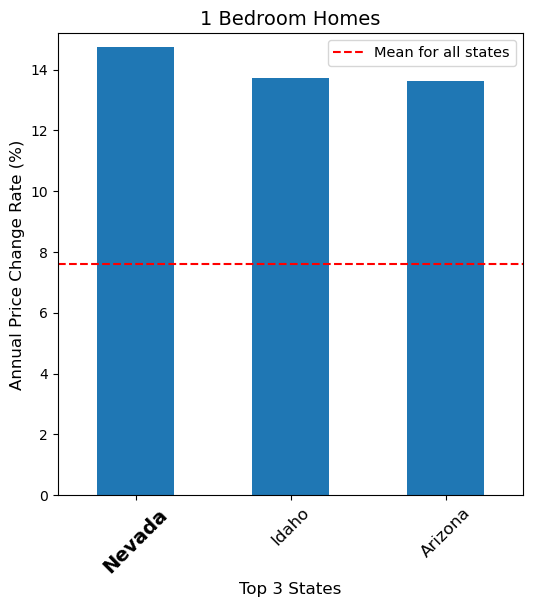

In [27]:
# Plot 1 bedroom homes
fig1, ax1 = plt.subplots(figsize=(6, 6))
sorted_1b.plot('state', '1 bedroom homes avg yearly % change', kind='bar', ax=ax1)
ax1.axhline(y=overall_avg_1b, color='r', linestyle='--')
ax1.set_title('1 Bedroom Homes', fontsize=14)
ax1.set_xlabel('Top 3 States', fontsize=12)
ax1.set_ylabel('Annual Price Change Rate (%)', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize = 12)
ax1.legend([ax1.lines[0]], ['Mean for all states'], fontsize=10.5)
ax1.set_ylim(0, 15.2)
custom_highlight(ax1, highest_1b)

# Save figure
plt.savefig('percent_change_1bedroom.png', bbox_inches = 'tight')
plt.show()

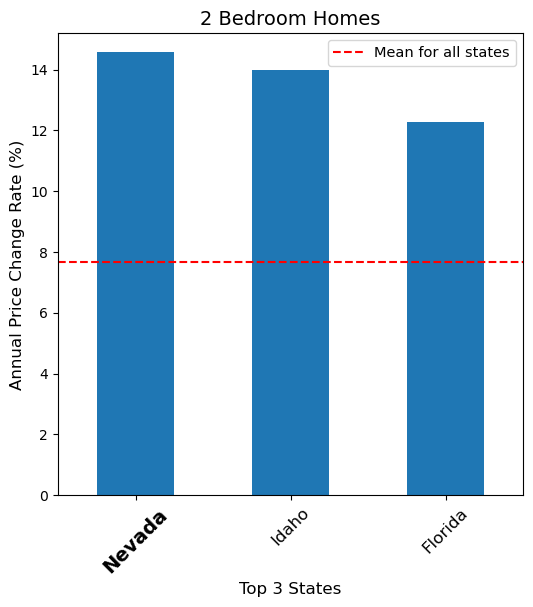

In [32]:
# Plot 2 bedroom homes
fig2, ax2 = plt.subplots(figsize=(6, 6))
sorted_2b.plot('state', '2 bedroom homes avg yearly % change', kind='bar', ax=ax2)
ax2.axhline(y=overall_avg_2b, color='r', linestyle='--')
ax2.set_title('2 Bedroom Homes', fontsize=14)
ax2.set_xlabel('Top 3 States', fontsize=12)
ax2.set_ylabel('Annual Price Change Rate (%)', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize = 12)
ax2.legend([ax2.lines[0]], ['Mean for all states'], fontsize=10.5)
ax2.set_ylim(0, 15.2)
custom_highlight(ax2, highest_2b)

# Save figure
plt.savefig('percent_change_2bedroom.png')
plt.show()

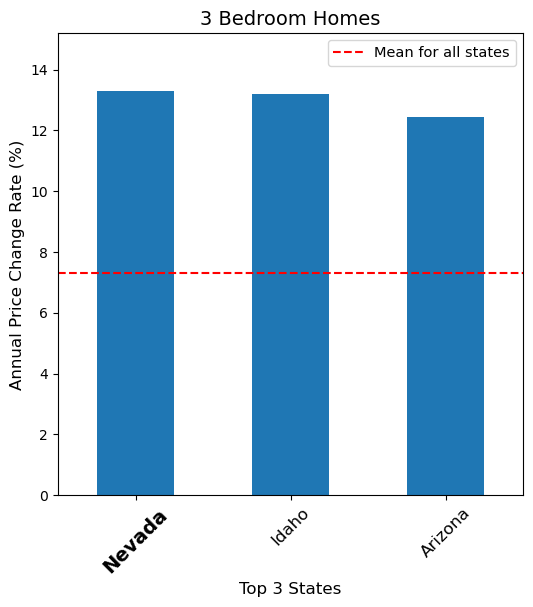

In [31]:
# Plot 3 bedroom homes
fig3, ax3 = plt.subplots(figsize=(6, 6))
sorted_3b.plot('state', '3 bedroom homes avg yearly % change', kind='bar', ax=ax3)
ax3.axhline(y=overall_avg_3b, color='r', linestyle='--')
ax3.set_title('3 Bedroom Homes', fontsize=14)
ax3.set_xlabel('Top 3 States', fontsize=12)
ax3.set_ylabel('Annual Price Change Rate (%)', fontsize=12)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, fontsize = 12)
ax3.legend([ax3.lines[0]], ['Mean for all states'], fontsize=10.5)
ax3.set_ylim(0, 15.2)
custom_highlight(ax3, highest_3b)

# Save figure
plt.savefig('percent_change_3bedroom.png')
plt.show()

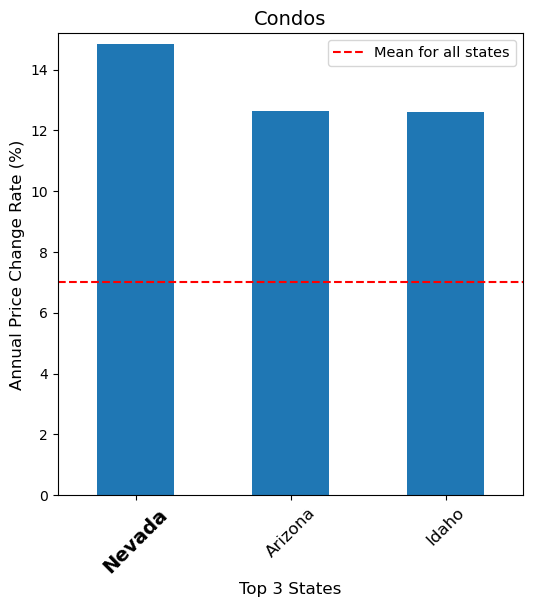

In [30]:
# Plot condos
fig4, ax4 = plt.subplots(figsize=(6, 6))
sorted_condos.plot('state', 'condos avg yearly % change', kind='bar', ax=ax4)
ax4.axhline(y=overall_avg_condos, color='r', linestyle='--')
ax4.set_title('Condos', fontsize=14)
ax4.set_xlabel('Top 3 States', fontsize=12)
ax4.set_ylabel('Annual Price Change Rate (%)', fontsize=12)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, fontsize = 12)
ax4.legend([ax4.lines[0]], ['Mean for all states'], fontsize=10.5)
ax4.set_ylim(0, 15.2)
custom_highlight(ax4, highest_condos)

# Save figure
plt.savefig('percent_change_condos.png')
plt.show()

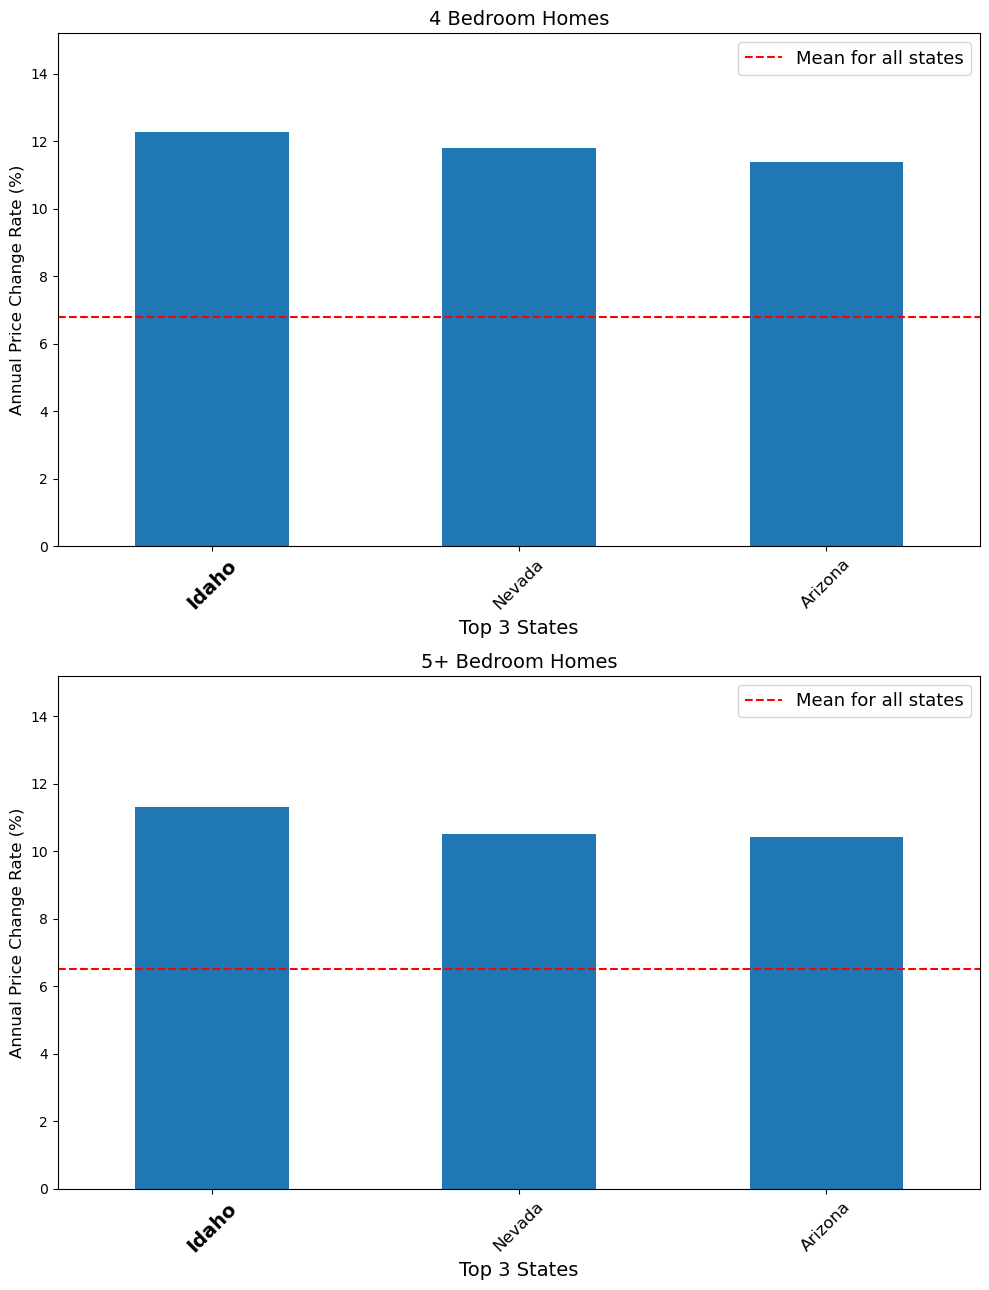

In [29]:
# Create subplots for 4-5+ bedroom homes
fig2, (ax4, ax5) = plt.subplots(2, 1, figsize=(10, 13))

# Plot 4 bedroom homes
sorted_4b.plot('state', '4 bedroom homes avg yearly % change', kind='bar', ax=ax4)
ax4.axhline(y=overall_avg_4b, color='r', linestyle='--')
ax4.set_title('4 Bedroom Homes', fontsize=14)
ax4.set_xlabel('Top 3 States', fontsize=14)
ax4.set_ylabel('Annual Price Change Rate (%)', fontsize=12)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, fontsize=12)
ax4.legend([ax4.lines[0]], ['Mean for all states'], fontsize=13)
ax4.set_ylim(0,15.2)
custom_highlight(ax4, highest_4b)

# Plot 5+ bedroom homes
sorted_5b.plot('state', '5+ bedroom homes avg yearly % change', kind='bar', ax=ax5)
ax5.axhline(y=overall_avg_5b, color='r', linestyle='--')
ax5.set_title('5+ Bedroom Homes', fontsize=14)
ax5.set_xlabel('Top 3 States', fontsize=14)
ax5.set_ylabel('Annual Price Change Rate (%)', fontsize=12)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, fontsize=12)
ax5.legend([ax5.lines[0]], ['Mean for all states'], fontsize=13)
ax5.set_ylim(0,15.2)
custom_highlight(ax5, highest_5b)

# Configurations for figure 2
plt.tight_layout()

# Save figures
plt.savefig('percent_change_Idaho.png')
plt.show()

In [21]:
# # Display Nevada 1 - 3 bedroom homes price timeseries

# # ... (previous code)

# # Plot every prop type as scatter plot
# for i, property_type in enumerate(property_types):
#     x_axis = nv_plots[i].index 
#     y_axis = nv_plots[i]['price']  
    
#     # Scatter plot
#     subplot[i].scatter(x_axis, y_axis, label='Data')
#     subplot[i].plot(x_axis, y_axis, "o-", color='blue', label='Connecting Line')
    
#     # Perform linear regression
#     slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#     # Calculate the regression line
#     regression_line = slope * x_axis + intercept
    
#     # Plot regression line
#     subplot[i].plot(x_axis, regression_line, "r-", label='Linear Regression')
#     subplot[i].annotate(line_eq, xy=(0.2, 0.8), xycoords='axes fraction', fontsize=12, color='red')
    
#     # Calculate correlation
#     correlation = np.corrcoef(x_axis, y_axis)[0, 1]
#     subplot[i].annotate(f'Correlation: {correlation:.2f}', xy=(0.2, 0.7), xycoords='axes fraction', fontsize=12, color='green')
    
#     subplot[i].set_title(f'{property_type} in Nevada')
#     subplot[i].legend(fontsize='7')
#     subplot[i].set_ylabel('Average Price')
#     subplot[i].set_xlabel('Year')

# plt.tight_layout()
# plt.show()

In [22]:
# # Display Nevada 1 - 3 bedroom homes price timeseries

# # Filter for specific state (Nevada)
# nv_df = reduced_df[reduced_df['state'] == 'Nevada']

# # Filter for different property types
# property_types = ['1 bedroom homes', '2 bedroom homes', '3 bedroom homes', 'condos']
# nv_plots = []

# for property_type in property_types:
#     nv_data = nv_df[nv_df['property type'] == property_type].groupby('year').mean(numeric_only=True)
#     nv_plots.append(nv_data)

# # Subplots
# figure, subplot = plt.subplots(len(property_types), 1, figsize=(10, 10), sharex=True)

# # Plot every prop type as scatter plot
# for i, property_type in enumerate(property_types):
#     x_axis = nv_plots[i].index 
#     y_axis = nv_plots[i]['price']  
    
#     # Scatter plot
#     ax = subplot[i]
#     ax.scatter(x_axis, y_axis, label='Data', color='blue')
#     ax.plot(x_axis, y_axis, "o-", color='blue', label='Connecting Line')
    
#     # Perform linear regression
#     slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#     # Calculate the regression line
#     regression_line = slope * x_axis + intercept
    
#     # Plot regression line
#     ax.plot(x_axis, regression_line, "r-", label='Linear Regression')
#     ax.annotate(line_eq, xy=(0.2, 0.8), xycoords='axes fraction', fontsize=12, color='red')
    
#     # display correlation
#     ax.annotate(f'Correlation: {r_value:.3f}', xy=(0.2, 0.7), xycoords='axes fraction', fontsize=12, color='green')
    
#     ax.set_title(f'{property_type} in Nevada')
#     ax.legend(fontsize='7')
#     ax.set_ylabel('Average Price')
#     ax.set_xlabel('Year')

# plt.tight_layout()
# plt.savefig('nevada_plots.png')
# plt.show()

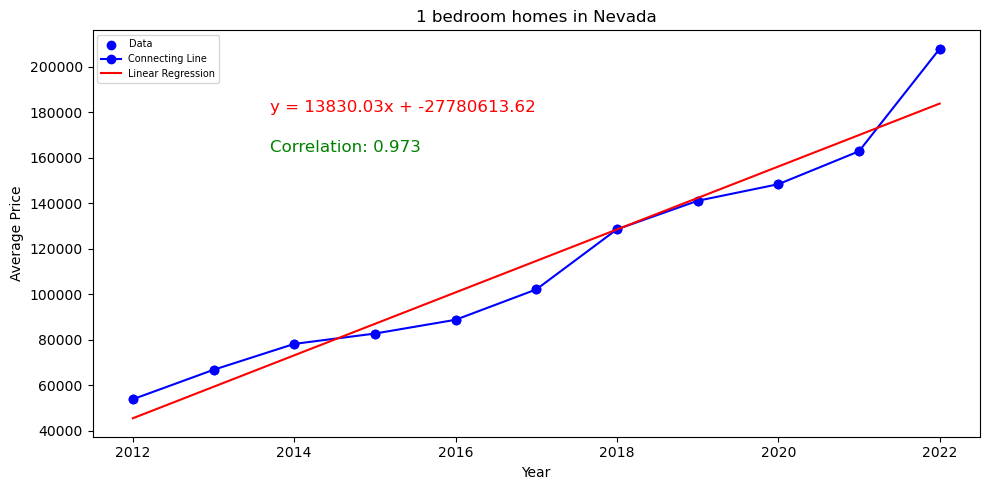

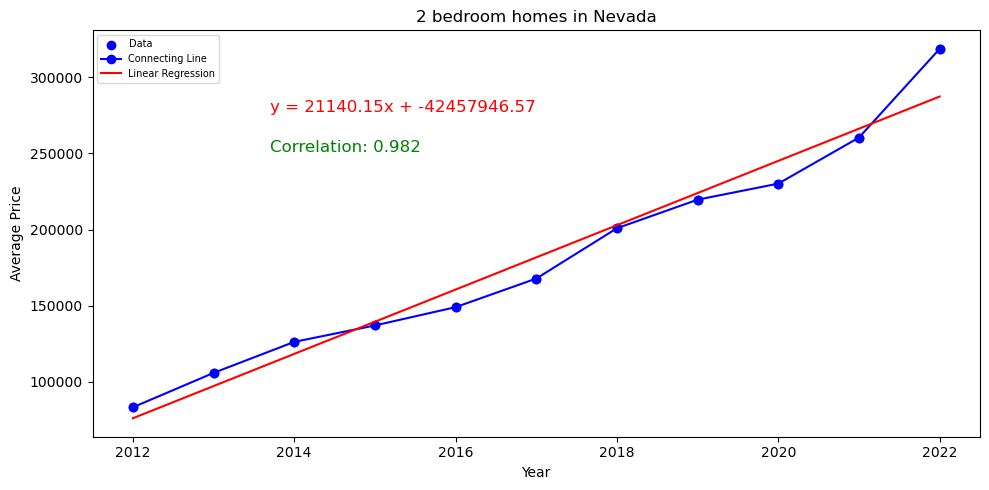

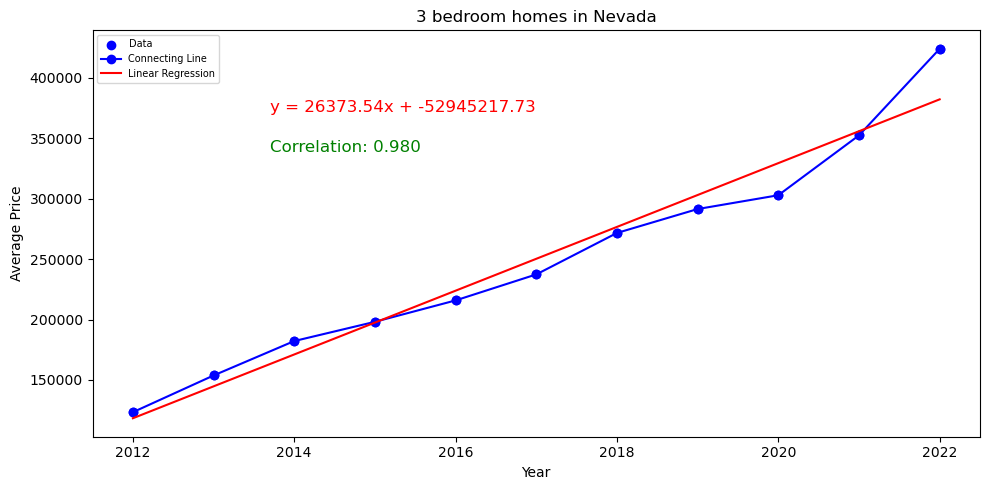

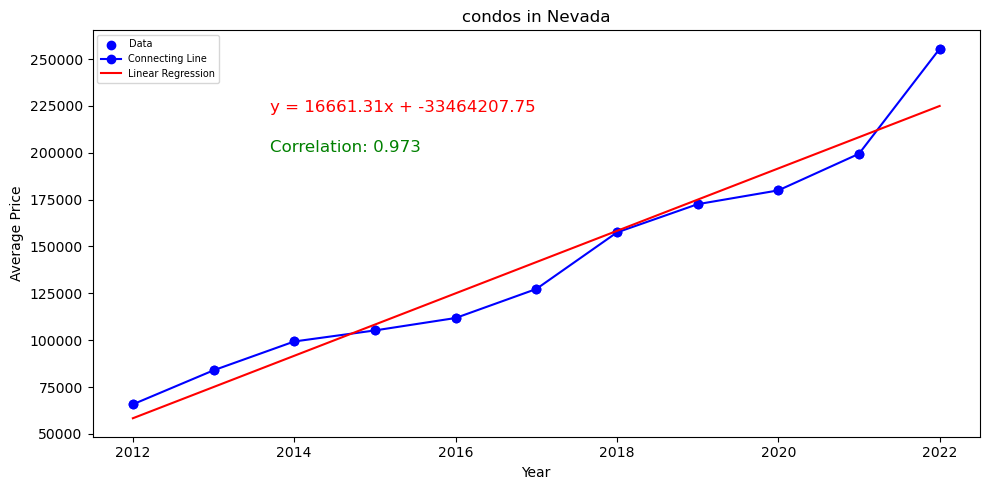

In [25]:
# Display Nevada 1 - 3 bedroom homes price timeseries

# Filter for specific state (Nevada)
nv_df = reduced_df[reduced_df['state'] == 'Nevada']

# Filter for different property types
property_types = ['1 bedroom homes', '2 bedroom homes', '3 bedroom homes', 'condos']

for property_type in property_types:
    nv_data = nv_df[nv_df['property type'] == property_type].groupby('year').mean(numeric_only=True)

    # Create a new figure for each property type
    figure, ax = plt.subplots(figsize=(10, 5))
    
    x_axis = nv_data.index 
    y_axis = nv_data['price']  
    
    # Scatter plot
    ax.scatter(x_axis, y_axis, label='Data', color='blue')
    ax.plot(x_axis, y_axis, "o-", color='blue', label='Connecting Line')
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Calculate the regression line
    regression_line = slope * x_axis + intercept
    
    # Plot regression line
    ax.plot(x_axis, regression_line, "r-", label='Linear Regression')
    ax.annotate(line_eq, xy=(0.2, 0.8), xycoords='axes fraction', fontsize=12, color='red')
    
    # display correlation
    ax.annotate(f'Correlation: {r_value:.3f}', xy=(0.2, 0.7), xycoords='axes fraction', fontsize=12, color='green')
    
    ax.set_title(f'{property_type} in Nevada')
    ax.legend(fontsize='7')
    ax.set_ylabel('Average Price')
    ax.set_xlabel('Year')

    # Save figures
    plt.tight_layout()
    plt.savefig(f'nevada_{property_type.replace(" ", "_").lower()}_plot.png')
    plt.show()

In [24]:
# # Display Nevada 1 - 3 bedroom homes price timeseries

# # Filter for specific state (Nevada)
# nv_df = reduced_df[reduced_df['state'] == 'Nevada']

# # Filter for different property types
# property_types = ['1 bedroom homes', '2 bedroom homes', '3 bedroom homes', 'condos']
# nv_plots = []

# for property_type in property_types:
#     nv_data = nv_df[nv_df['property type'] == property_type].groupby('year').mean(numeric_only=True)
#     nv_plots.append(nv_data)

# # Subplots
# figure, subplot = plt.subplots(len(property_types), 1, figsize=(10, 10), sharex=True)

# # Plot every prop type as scatter plot
# for i, property_type in enumerate(property_types):
#     x_axis = nv_plots[i].index 
#     y_axis = nv_plots[i]['price']  
    
#     # Scatter plot
#     ax = subplot[i]
#     ax.scatter(x_axis, y_axis, label='Data', color='blue')
#     ax.plot(x_axis, y_axis, "o-", color='blue', label='Connecting Line')
    
#     # Perform linear regression
#     slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#     # Calculate the regression line
#     regression_line = slope * x_axis + intercept
    
#     # Plot regression line
#     ax.plot(x_axis, regression_line, "r-", label='Linear Regression')
#     ax.annotate(line_eq, xy=(0.2, 0.8), xycoords='axes fraction', fontsize=12, color='red')
    
#     # display correlation
#     ax.annotate(f'Correlation: {r_value:.3f}', xy=(0.2, 0.7), xycoords='axes fraction', fontsize=12, color='green')
    
#     ax.set_title(f'{property_type} in Nevada')
#     ax.legend(fontsize='7')
#     ax.set_ylabel('Average Price')
#     ax.set_xlabel('Year')

# plt.tight_layout()
# #plt.savefig('nevada_plots.png')
# plt.show()

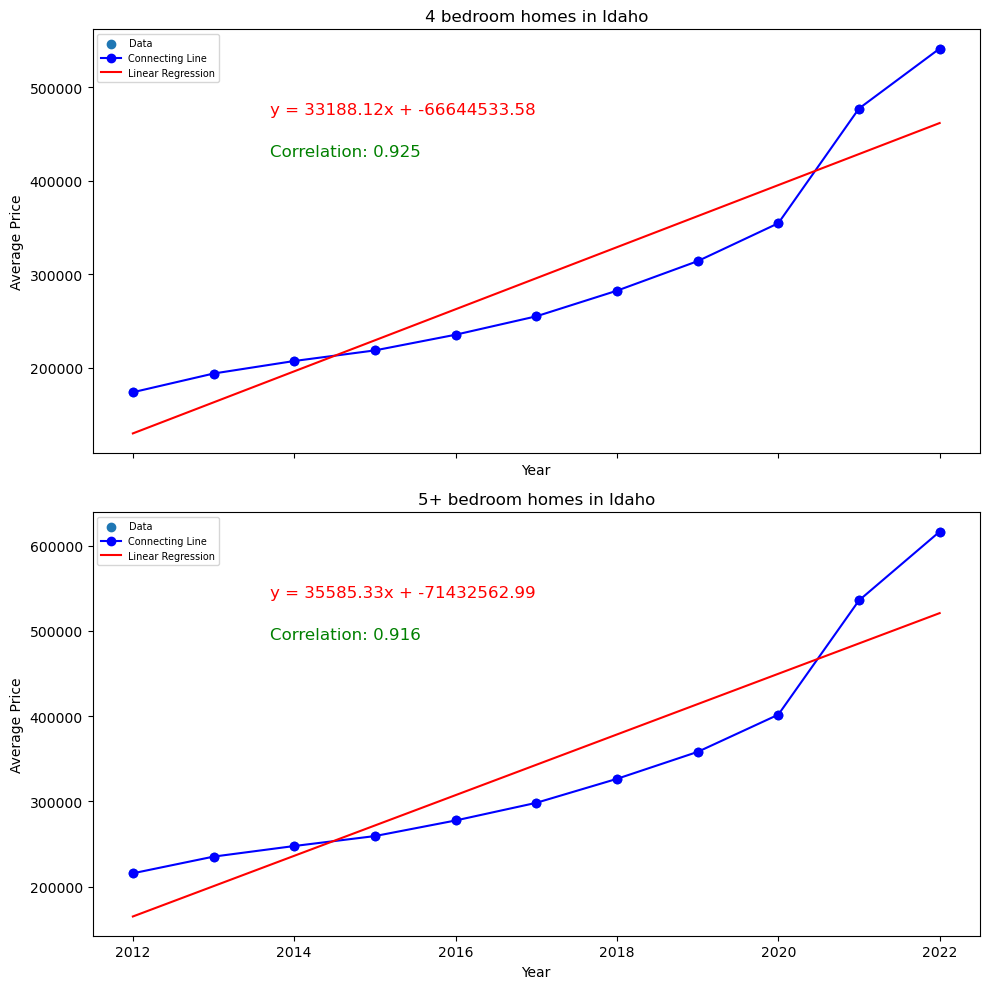

In [26]:
# Display Idaho 4-5+ bedroom homes price timeseries

# Filter for specific state (Idaho)
id_df = reduced_df[reduced_df['state'] == 'Idaho']

# Filter for different property types
property_types = ['4 bedroom homes', '5+ bedroom homes']
id_plots = []

for property_type in property_types:
    id_data = id_df[id_df['property type'] == property_type].groupby('year').mean(numeric_only=True)
    id_plots.append(id_data)

# Subplots
figure, subplot = plt.subplots(len(property_types), 1, figsize=(10, 10), sharex=True)

# Plot every prop type as scatter plot
for i, property_type in enumerate(property_types):
    x_axis = id_plots[i].index 
    y_axis = id_plots[i]['price']  
    
    # Scatter plot
    subplot[i].scatter(x_axis, y_axis, label='Data')
    subplot[i].plot(x_axis, y_axis, "o-", color='blue', label='Connecting Line')
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Calculate the regression line
    regression_line = slope * x_axis + intercept
    
    # Plot regression line
    subplot[i].plot(x_axis, regression_line, "r-", label='Linear Regression')
    subplot[i].annotate(line_eq, xy=(0.2, 0.8), xycoords='axes fraction', fontsize=12, color='red')
    subplot[i].annotate(f'Correlation: {r_value:.3f}', xy=(0.2, 0.7), xycoords='axes fraction', fontsize=12, color='green')
    
    subplot[i].set_title(f'{property_type} in Idaho') 
    subplot[i].legend(fontsize='7')
    subplot[i].set_ylabel('Average Price')
    subplot[i].set_xlabel('Year')

plt.tight_layout()
plt.show()

In [43]:
# # Newyork timeseries analysis
# ny_df = reduced_df[reduced_df['state'] == 'New York']
# ny_df_year = ny_df.groupby('year').mean(numeric_only=True)
# ny_df_year.reset_index(inplace=True)  

# # Scatter plot
# ny_scatter = ny_df_year.plot('year', 'price', kind='scatter', color='blue')

# # Add connecting line
# ny_df_year.plot('year', 'price', kind='line', color='blue', ax=ny_scatter)

In [44]:
# # Filter for specific state
# ny_df = reduced_df[reduced_df['state'] == 'New York']

# # Filter for different property types
# property_types = ['1 bedroom homes', '2 bedroom homes', '3 bedroom homes', '4 bedroom homes', '5+ bedroom homes']
# ny_plots = []

# for property_type in property_types:
#     ny_data = ny_df[ny_df['property type'] == property_type].groupby('year').mean(numeric_only=True)
#     ny_plots.append(ny_data)

# # Subplots
# figure, subplot = plt.subplots(len(property_types), 1, figsize=(10, 10), sharex=True)

# # Plot every prop type as scatter plot with regression line
# for i, property_type in enumerate(property_types):
#     x_axis = ny_plots[i].index 
#     y_axis = ny_plots[i]['price']  
    
#     # Scatter plot
#     subplot[i].scatter(x_axis, y_axis, label='Data')
#     subplot[i].plot(x_axis, y_axis, "o-", color='blue', label='Connecting Line')
    
#     # Perform linear regression
#     slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
    
#     # Calculate the regression line
#     regression_line = slope * x_axis + intercept
    
#     # Plot regression line
#     subplot[i].plot(x_axis, regression_line, "r-", label='Linear Regression')
    
#     subplot[i].set_title(f'{property_type} in New York')
#     subplot[i].legend(fontsize='7')

# plt.tight_layout()
# plt.show()

In [45]:
# # Filter for specific state
# ny_df = reduced_df[reduced_df['state'] == 'New York']

# # Filter for different property types
# property_types = ['All home types - top tier', 'All home types - bottom tier']
# ny_plots = []

# for property_type in property_types:
#     ny_data = ny_df[ny_df['property type'] == property_type].groupby('year').mean(numeric_only=True)
#     ny_plots.append(ny_data)

# # Subplots
# figure, subplot = plt.subplots(len(property_types), 1, figsize=(10, 10), sharex=True)

# # Plot every prop type as scatter plot with regression line
# for i, property_type in enumerate(property_types):
#     x_axis = ny_plots[i].index 
#     y_axis = ny_plots[i]['price']  
    
#     # Scatter plot
#     subplot[i].scatter(x_axis, y_axis, label='Data')
#     subplot[i].plot(x_axis, y_axis, "o-", color='blue', label='Connecting Line')
    
#     # Perform linear regression
#     slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#     # Calculate the regression line
#     regression_line = slope * x_axis + intercept
    
#     # Plot regression line
#     subplot[i].plot(x_axis, regression_line, "r-", label='Linear Regression')
#     subplot[i].annotate(line_eq, xy=(0.2, 0.8), xycoords='axes fraction', fontsize=12, color='red')
    
#     subplot[i].set_title(f'{property_type} in New York')
#     subplot[i].legend(fontsize='7')

# plt.tight_layout()
# plt.show()


In [46]:
# # Percentage increase

# # high income percentage inc
# ny_hi_pi = ny_plots[0]
# hi_2012 = ny_hi_pi.loc[2012, 'price']
# hi_2023 = ny_hi_pi.loc[2023, 'price']

# hi_pc = f"{round(((hi_2023 - hi_2012)/hi_2012) * 100, 2)}%"


# # low income percentage inc
# ny_li_pi = ny_plots[1]
# li_2012 = ny_li_pi.loc[2012, 'price']
# li_2023 = ny_li_pi.loc[2023, 'price']

# li_pc = f"{round(((li_2023 - li_2012)/li_2012) * 100, 2)}%"

# print(hi_pc, li_pc)

In [47]:
# # Testing MI 
# reduced_df_mi4 = reduced_df[reduced_df['state'] == 'Michigan']
# reduced_df_mi_4 = reduced_df_mi4[reduced_df_mi4['property type'] == '4 bedroom homes']
# mi_plot = reduced_df_mi_4.groupby('year').mean(numeric_only=True)

# mi_plot.plot(kind='bar')